In [1]:
# Python pakage for numerical processing
import os

#First, we need to tell python that we want to import specific packages (bits of code) that allow us then to perform specific operations
#Networkx is used for network analysis
os.chdir('/Users/brucemiller/Google Drive/UCF Courses/POS6729-Political Network Analysis/JupyterNotebooks/Multilayer')
#http://www.mkivela.com/2015/12/11/multilayer-networks-library/
import pymnet as pm
import networkx as nx 
# Data Visualisation library in Python
import matplotlib.pyplot as plt
# Python pakage for numerical processing
import numpy as np
import pandas as pd
import collections
#Extra packages, community allows to assess communities (modules) 
#in networks using louvain, but can use leiden as well
import community as louv
%pylab inline
#Adjusted rand score allows to assess whether two clusters are composed 
#by the same or different nodes, useful to assess whether modules are similar in mpx networks
from sklearn.metrics.cluster import adjusted_rand_score
# Python package to change directory

#change the directory to where you have the files you will need to use
os.chdir('/Users/brucemiller/Google Drive/UCF Courses/POS6729-Political Network Analysis/JupyterNotebooks')


Populating the interactive namespace from numpy and matplotlib


In [2]:
#store the file name in a variable
wfile1 = 'confl1.txt'
wfile2 = 'coop1.txt'

In [96]:
confl = pd.read_csv(wfile1, sep='\t')
coop  = pd.read_csv(wfile2, sep='\t')


In [97]:
print(confl)
print(coop)

         s      t  w
0      id1    id2  0
1      id1    id3  0
2      id1    id4  1
3      id1    id5  1
4      id3    id6  0
..     ...    ... ..
821  id565  id566  1
822  id565  id222  0
823  id567  id568  0
824  id567  id569  0
825  id567  id183  1

[826 rows x 3 columns]
         s      t  w
0      id1    id2  1
1      id1    id3  1
2      id1    id4  0
3      id1    id5  1
4      id3    id6  1
..     ...    ... ..
821  id565  id566  0
822  id565  id222  0
823  id567  id568  1
824  id567  id569  1
825  id567  id183  0

[826 rows x 3 columns]


In [98]:
print(confl)
print(coop)

         s      t  w
0      id1    id2  0
1      id1    id3  0
2      id1    id4  1
3      id1    id5  1
4      id3    id6  0
..     ...    ... ..
821  id565  id566  1
822  id565  id222  0
823  id567  id568  0
824  id567  id569  0
825  id567  id183  1

[826 rows x 3 columns]
         s      t  w
0      id1    id2  1
1      id1    id3  1
2      id1    id4  0
3      id1    id5  1
4      id3    id6  1
..     ...    ... ..
821  id565  id566  0
822  id565  id222  0
823  id567  id568  1
824  id567  id569  1
825  id567  id183  0

[826 rows x 3 columns]


In [110]:
#Looks like edges with 0 value exist -so we remove these using pandas from both files
confl = confl[confl.w != 0] 
coop = coop[coop.w != 0]
#check length to see if they are same length (needed for last exercise)
print('The length of confl is:  ',len(confl))
print('The length of coop is:  ', len(coop))

The length of confl is:   306
The length of coop is:   502


In [111]:
#load into networkx
coopx= nx.from_pandas_edgelist(coop,'s','t','w') 
conflx = nx.from_pandas_edgelist(confl,'s','t','w')

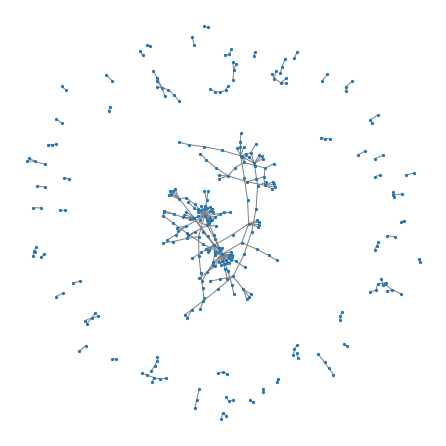

In [112]:
figure(figsize(6, 6))
nx.draw(conflx, pos=nx.spring_layout(conflx), node_size=5, edge_color='grey')

[Text(0, 0, '30'),
 Text(0, 0, '28'),
 Text(0, 0, '12'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

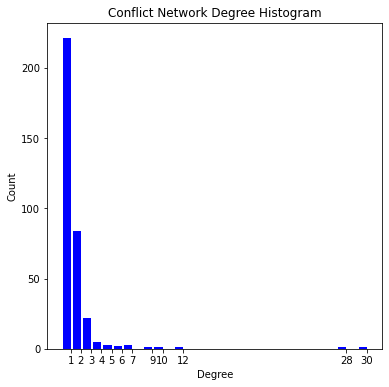

In [113]:
#Examine Degree Distribution in conflx
G = conflx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Conflict Network Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

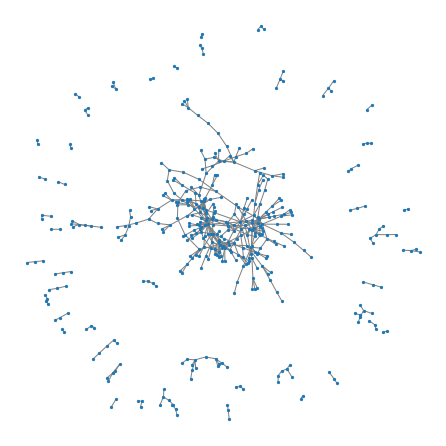

In [114]:
figure(figsize(6, 6))
nx.draw(coopx, pos=nx.spring_layout(coopx), node_size=5, edge_color='grey')

[Text(0, 0, '29'),
 Text(0, 0, '15'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

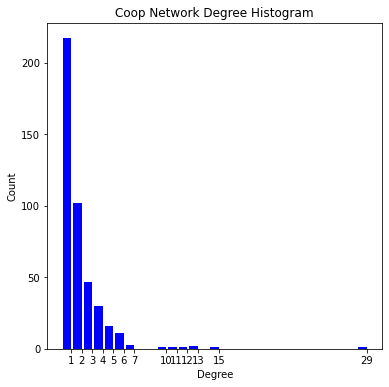

In [115]:
#Then same for coopx
G = coopx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Coop Network Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

#### Measures:

- Order (no. of nodes), Size (no. of edges)
- Diameter
- Average Shortest Path Length
- Average Clustering Coefficient
- Average Degree
- Average degree centrality
- Closeness Centrality
- Node Betweenness Centrality
- Degree distribution
- Gini index of degrees

## coopx network information: 

In [116]:
print('COOPERATION network information and metrics')
print(nx.info(coopx))
#print('coopx Diameter = ',nx.diameter(coopx)) NETWORK IS NOT FULLY CONNECTED
#print('Shortest average path length: ',nx.average_shortest_path_length(coopx))NETWORK NOT FULLY CONNECTED
print('average clustering: ', nx.average_clustering(coopx))
print('average degree:  ', np.average(list(dict(nx.degree(coopx)).values())))
print('average degree centrality:  ', np.average(list(nx.degree_centrality(coopx).values())))
print('average closeness centrality:  ',np.average(list(nx.closeness_centrality(coopx).values())))
print('average betweeness centrality:  ', np.average(list(nx.betweenness_centrality(coopx).values())))
print('density : ',nx.density(coopx) )
print('local efficiency: ', nx.local_efficiency(coopx))
print('global efficiency: ', nx.global_efficiency(coopx))
print('average clustering: ', np.average(list(nx.clustering(coopx).values())))

COOPERATION network information and metrics
Name: 
Type: Graph
Number of nodes: 433
Number of edges: 476
Average degree:   2.1986
average clustering:  0.07892533788846601
average degree:   2.1986143187066975
average degree centrality:   0.005089384997006243
average closeness centrality:   0.05970184292608739
average betweeness centrality:   0.004783609102208629
density :  0.005089384997006244
local efficiency:  0.08723915802636839
global efficiency:  0.07158026611223227
average clustering:  0.07892533788846602


In [117]:
list(nx.betweenness_centrality(coopx).values())

[0.028847472570892575,
 0.014425987602618729,
 0.22925135392857618,
 0.005978237519977855,
 0.019638981783231205,
 0.0,
 0.0,
 0.0,
 0.0,
 6.7135000429664e-05,
 0.0056370979402044115,
 0.0076453067841443295,
 4.9019206662929255e-05,
 0.008346223253415828,
 0.0,
 0.0,
 0.0,
 0.007065207117998925,
 0.005886316510454028,
 0.0027489800594982334,
 0.00878713642634757,
 0.0009663564429612376,
 0.0,
 0.0,
 0.004064343994233601,
 0.0,
 0.008346223253415826,
 0.0,
 0.0,
 0.0,
 0.038386850198715794,
 0.0,
 0.053293040051599884,
 0.054938687282449564,
 0.013792214488270171,
 0.0,
 0.019223835676072585,
 0.0,
 0.0,
 0.00017483232873797451,
 0.0036510819952106275,
 3.340126116614902e-05,
 0.0,
 0.0073428111745768845,
 0.004316166721909186,
 0.0,
 0.0,
 0.0,
 0.006857554867673466,
 0.0,
 0.0,
 0.006687274931345571,
 0.047810824067643524,
 0.020040840085085138,
 0.020429807224084103,
 0.005574890435679298,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002792816017874022,
 0.0,
 0.002792816017874022,
 0.0,
 0.0,
 1.6112

[]

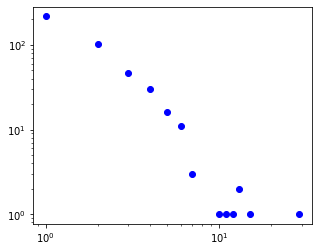

In [118]:
figure(figsize(5, 4))
plot(nx.degree_histogram(coopx), 'bo')
plt.loglog()

[]

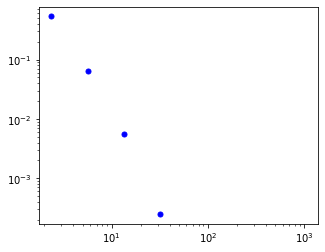

In [119]:
x, bins = np.histogram(list(dict(nx.degree(coopx)).values()),
                       bins=np.logspace(0, 10, num=9, base=2.),
                       density=True)
figure(figsize(5, 4))
plot(bins[1:], x, 'bo', markersize=5)
plt.loglog()

## conflx network information: 

In [120]:
print('CONFLICTS network information and metrics')
print(nx.info(conflx))
#print('coopx Diameter = ',nx.diameter(coopx)) NETWORK IS NOT FULLY CONNECTED
#print('Shortest average path length: ',nx.average_shortest_path_length(coopx))NETWORK NOT FULLY CONNECTED
print('average clustering: ', nx.average_clustering(conflx))
print('average degree:  ', np.average(list(dict(nx.degree(conflx)).values())))
print('average degree centrality:  ', np.average(list(nx.degree_centrality(conflx).values())))
print('average closeness centrality:  ',np.average(list(nx.closeness_centrality(conflx).values())))
print('average betweeness centrality:  ', np.average(list(nx.betweenness_centrality(conflx).values())))
print('density : ',nx.density(conflx) )
print('local efficiency: ', nx.local_efficiency(conflx))
print('global efficiency: ', nx.global_efficiency(conflx))

CONFLICTS network information and metrics
Name: 
Type: Graph
Number of nodes: 345
Number of edges: 306
Average degree:   1.7739
average clustering:  0.0062408478300532266
average degree:   1.7739130434782608
average degree centrality:   0.005156723963599595
average closeness centrality:   0.03507767999144777
average betweeness centrality:   0.003553962390965341
density :  0.005156723963599595
local efficiency:  0.006350118591497901
global efficiency:  0.04747808020337111


In [121]:
list(nx.betweenness_centrality(conflx).values())

[0.031290256966574004,
 0.02983253101905214,
 0.03345989558614144,
 0.007780188487355075,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0026103464641670624,
 0.0,
 0.0004068072411688928,
 0.0,
 3.390060343074107e-05,
 3.390060343074107e-05,
 0.0,
 3.390060343074107e-05,
 3.390060343074107e-05,
 0.0,
 0.0,
 0.07405586819445387,
 0.0026103464641670624,
 0.04868126652654418,
 0.0,
 0.0,
 0.010288833141229914,
 0.005203742626618754,
 0.0400366126517052,
 0.035595633602278125,
 0.0,
 0.0026103464641670624,
 0.005186792324903384,
 0.0,
 5.08509051461116e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 1.6950301715370534e-05,
 0.0,
 0.0,
 0.0002034036205844464,
 0.00011865211200759374,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0008588152869121071,
 0.00011865211200759374,
 0.0,
 0.0,
 0.012712726286527901,
 6.780120686148214e-05,
 0.00013560241372296427,
 0.0,
 0.0,
 6.780120686148214e-05,
 0.0,
 0.0,
 1.6950301715370534e-05,
 0.0,
 0.0,
 0.0,
 0.0026103464641670624,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07119126720455625,
 0.07261509254864737

[]

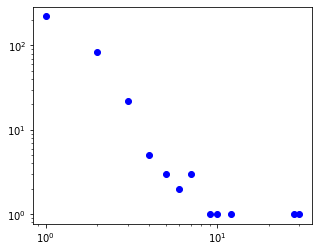

In [122]:
figure(figsize(5, 4))
plot(nx.degree_histogram(conflx), 'bo')
plt.loglog()

[]

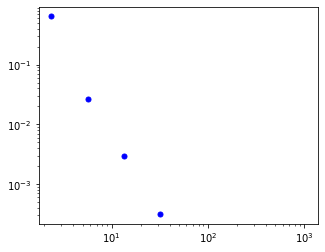

In [123]:
x, bins = np.histogram(list(dict(nx.degree(conflx)).values()),
                       bins=np.logspace(0, 10, num=9, base=2.),
                       density=True)
figure(figsize(5, 4))
plot(bins[1:], x, 'bo', markersize=5)
plt.loglog()

## Correlation Analysis between networks for betweenness centrality, degree centrality, and clustering coefficient

In [124]:
#use Multiplex network to performa correlation

In [125]:
#merge files into one file format after renaming weight columns
#rename weight columns, note we do not remove zero weight rows. 
conflmp = pd.read_csv(wfile1, sep='\t')
coopmp  = pd.read_csv(wfile2, sep='\t')

In [126]:
#merge files
coopmp.rename(columns={"s":"s1","t":"t1","w": "w1"},inplace=True)
conflmp.rename(columns={"s":"s2","t":"t2","w":"w2"},inplace=True)
print(coopmp.columns)
print(conflmp.head(3))
print(coopmp.head(3))


Index(['s1', 't1', 'w1'], dtype='object')
    s2   t2  w2
0  id1  id2   0
1  id1  id3   0
2  id1  id4   1
    s1   t1  w1
0  id1  id2   1
1  id1  id3   1
2  id1  id4   0


In [127]:
result = pd.concat([coopmp, conflmp], axis=1)
result

,s1,t1,w1,s2,t2,w2
0,id1,id2,1,id1,id2,0
1,id1,id3,1,id1,id3,0
2,id1,id4,0,id1,id4,1
3,id1,id5,1,id1,id5,1
4,id3,id6,1,id3,id6,0
...,...,...,...,...,...,...
821,id565,id566,0,id565,id566,1
822,id565,id222,0,id565,id222,0
823,id567,id568,1,id567,id568,0
824,id567,id569,1,id567,id569,0


In [128]:
result.drop('t2', inplace=True, axis=1)
result.drop('s2', inplace=True, axis=1)
print(result.columns)

Index(['s1', 't1', 'w1', 'w2'], dtype='object')


In [129]:
result.rename(columns={"s1":"s","t1":"t"},inplace=True)
result.columns
mpl = result
print(result.head(3))
print(mpl.head(3))

     s    t  w1  w2
0  id1  id2   1   0
1  id1  id3   1   0
2  id1  id4   0   1
     s    t  w1  w2
0  id1  id2   1   0
1  id1  id3   1   0
2  id1  id4   0   1


In [130]:
#create an empty multiplex network object - change name with netlist if in loop
mplex = pm.MultiplexNetwork(couplings='categorical')
#generate the network data -> the following code iterates over the dataframe and adds one layer per column.
#to a multiplex network object previously defined. it make sure that loops are not allowed, and that nodes id are not confused
#with relationship type.
for col in result.columns:
    for index, row in result.iterrows():
        if col != 's':
            if col !='t':
                n1 = row.s #as s identify node1 or source node
                n2 = row.t #as t identifies node2 or target node
                we = row[col] #the weight of the node (0/1 in this case)
                if row.s != row.t:
                    mplex[n1,n2,col,col]=we

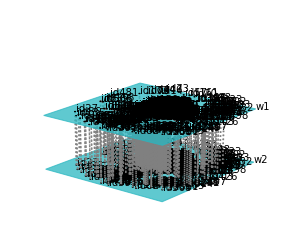

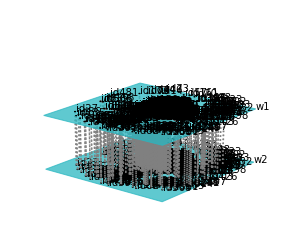

In [131]:
#draw the multiplex network, this is a bit bad, but you can try to make it more visually appealing. 
pm.draw(mplex)

In [132]:
#assess nodes edges, layers. 
N = len(set(mplex)) #number of nodes  
eee = list(mplex.edges)   #edgelist
M = len(eee)            #number of edges
L = len (mplex.get_layers()) #number of layers

print('Nodes =' + str(N))
print('Layers =' + str(L))
print('Edges =' + str(M)) 

Nodes =568
Layers =2
Edges =1347


In [133]:
#let's play with degree centralty and density
degm =pm.multiplex_degs(mplex,degstype='nodes')
densm = pm.multiplex_density(mplex)
degpd =  pd.DataFrame.from_dict(degm)
#degpd = pd.Dataframe.from_dict(degm)
assort = degpd.corr('spearman')

#assess the difference between the degree distribution in layer 1 vs layer 2, are they correlated?
#What does it imply?
degpd
print(densm,degpd)
assort

{'w1': 0.0029560076508433316, 'w2': 0.0018816603323645578}        w1  w2
id186   2   1
id369   2   2
id385   1   0
id342   0   1
id75    3   1
...    ..  ..
id188   1   1
id190   1   0
id203   2   0
id502   2   2
id301   2   0

[568 rows x 2 columns]


,w1,w2
w1,1.000000,0.337191
w2,0.337191,1.000000


In [134]:
#clustering in multiplex networks... what does it mean? Explain.
gcc = pm.gcc_aw(mplex)
gcc1, gcc2, gcc3 = pm.gcc_aw(mplex,returnCVector=True)

lcc = pm.avg_lcc_aw(mplex)
lcc1, lcc2, lcc3 = pm.avg_lcc_aw(mplex,returnCVector=True)

In [135]:
print(lcc, gcc)

0.03597712500735744 0.05236907730673317


In [136]:
print(lcc1,lcc2,lcc3)

0.031046756822315346 0.030931271307261334 0.0


In [137]:
print(gcc1,gcc2,gcc3)

0.06329989622967831 0.04704097116843703 0


## Approach using networkx with files with zeros loaded into networkx

In [138]:
#Alternative approach: list degree centrality and take spearman correlation of the two columns
#for this exercise we will use the file with zeros to have the same number of rows for both networks
dccoop = list(nx.degree_centrality(coopx).values())
dcconfl = list(nx.degree_centrality(conflx).values())

In [139]:
df1 = pd.DataFrame.from_dict(dccoop)
df2 = pd.DataFrame.from_dict(dcconfl)

In [140]:
newfile = pd.concat([df1, df2], axis=1)

In [141]:
newfile  #presents a problem because of the different lengths; can't do correlation

,0,0
0,0.023148,0.005814
1,0.016204,0.011628
2,0.067130,0.005814
3,0.011574,0.011628
4,0.030093,0.002907
...,...,...
428,0.002315,NaN
429,0.002315,NaN
430,0.002315,NaN
431,0.002315,NaN


In [142]:
#load into networkx
coopx2= nx.from_pandas_edgelist(coop,'s','t','w') 
conflx2 = nx.from_pandas_edgelist(confl,'s','t','w')

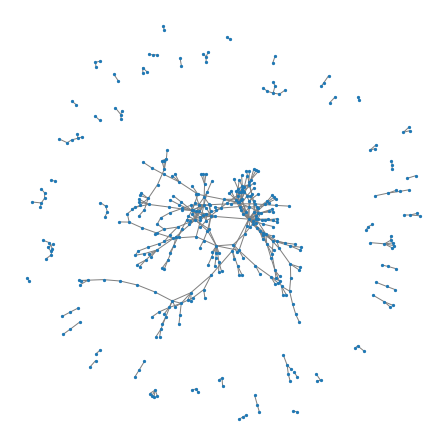

In [143]:
figure(figsize(6, 6))
nx.draw(coopx2, pos=nx.spring_layout(coopx2), node_size=5, edge_color='grey')

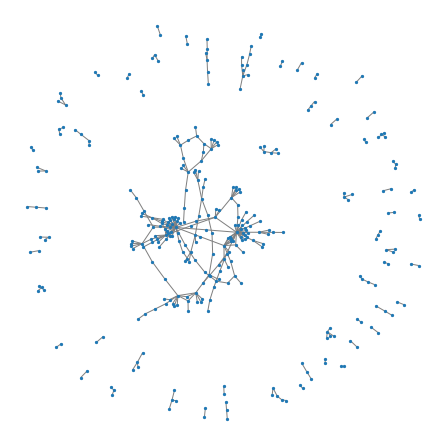

In [144]:
figure(figsize(6, 6))
nx.draw(conflx, pos=nx.spring_layout(conflx), node_size=5, edge_color='grey')

# Degree Centrality correlation between layers (part 2)

In [145]:
dccoop = list(nx.degree_centrality(coopx2).values())
dcconfl = list(nx.degree_centrality(conflx2).values())

In [146]:
dccoop2 = nx.degree_centrality(coopx2).values()
dcconfl2 = nx.degree_centrality(conflx2).values()

#print(dccoop2)
#print(dcconfl2)

In [147]:
df1 = pd.DataFrame.from_dict(dccoop2)
df2 = pd.DataFrame.from_dict(dcconfl2)
#print(df1.info, df2.info)

In [148]:
newfile = pd.concat([df1, df2], axis=1)

In [149]:
newfile

,0,0
0,0.023148,0.005814
1,0.016204,0.011628
2,0.067130,0.005814
3,0.011574,0.011628
4,0.030093,0.002907
...,...,...
428,0.002315,NaN
429,0.002315,NaN
430,0.002315,NaN
431,0.002315,NaN


In [150]:
degcentcorr = newfile.corr('spearman')

In [151]:
print(degcentcorr)

          0         0
0  1.000000  0.084473
0  0.084473  1.000000


# Betweenness Centrality between layers

In [152]:
bccoop2 = nx.betweenness_centrality(coopx2).values()
bcconfl2 = nx.betweenness_centrality(conflx2).values()

In [153]:
df1 = pd.DataFrame.from_dict(bccoop2)
df2 = pd.DataFrame.from_dict(bcconfl2)

In [154]:
newfile = pd.concat([df1, df2], axis=1)

In [155]:
betcentcorr = newfile.corr('spearman')
print(betcentcorr)

          0         0
0  1.000000  0.065708
0  0.065708  1.000000


## Clustering Coefficient between layers

In [156]:
cccoop2 = nx.clustering(coopx2).values()
ccconfl2 = nx.clustering(conflx2).values()

In [157]:
df1 = pd.DataFrame.from_dict(cccoop2)
df2 = pd.DataFrame.from_dict(ccconfl2)

In [158]:
newfile = pd.concat([df1, df2], axis=1)

In [159]:
cluscoefcorr = newfile.corr('spearman')
print(cluscoefcorr)

          0         0
0  1.000000  0.019932
0  0.019932  1.000000


## Alternative approach for degree centrality without using .values

In [160]:
dccoop2 = nx.degree_centrality(coopx2)
dcconfl2 = nx.degree_centrality(conflx2)
print(dccoop2)
print(dcconfl2)

{'id1': 0.023148148148148147, 'id2': 0.016203703703703703, 'id3': 0.06712962962962962, 'id5': 0.011574074074074073, 'id6': 0.03009259259259259, 'id7': 0.0023148148148148147, 'id8': 0.004629629629629629, 'id9': 0.004629629629629629, 'id12': 0.0023148148148148147, 'id15': 0.006944444444444444, 'id16': 0.013888888888888888, 'id18': 0.016203703703703703, 'id19': 0.004629629629629629, 'id22': 0.009259259259259259, 'id23': 0.0023148148148148147, 'id24': 0.0023148148148148147, 'id25': 0.0023148148148148147, 'id26': 0.006944444444444444, 'id104': 0.009259259259259259, 'id89': 0.009259259259259259, 'id77': 0.011574074074074073, 'id28': 0.004629629629629629, 'id29': 0.0023148148148148147, 'id30': 0.0023148148148148147, 'id31': 0.011574074074074073, 'id32': 0.0023148148148148147, 'id34': 0.009259259259259259, 'id35': 0.0023148148148148147, 'id36': 0.0023148148148148147, 'id37': 0.0023148148148148147, 'id38': 0.013888888888888888, 'id39': 0.0023148148148148147, 'id40': 0.009259259259259259, 'id41'

In [161]:
df1 = pd.DataFrame.from_dict(dccoop2,orient='index')
df2 = pd.DataFrame.from_dict(dcconfl2,orient='index')
print(df1.info)
print(df2.info)

<bound method DataFrame.info of               0
id1    0.023148
id2    0.016204
id3    0.067130
id5    0.011574
id6    0.030093
...         ...
id563  0.002315
id565  0.002315
id539  0.002315
id568  0.002315
id569  0.002315

[433 rows x 1 columns]>
<bound method DataFrame.info of               0
id1    0.005814
id4    0.011628
id5    0.005814
id3    0.011628
id7    0.002907
...         ...
id562  0.002907
id564  0.002907
id565  0.002907
id566  0.002907
id567  0.002907

[345 rows x 1 columns]>


In [162]:
newfile = pd.concat([df1, df2], axis=1)
newfile.info

<bound method DataFrame.info of               0         0
id1    0.023148  0.005814
id2    0.016204  0.005814
id3    0.067130  0.011628
id5    0.011574  0.005814
id6    0.030093       NaN
...         ...       ...
id553       NaN  0.002907
id557       NaN  0.002907
id560       NaN  0.002907
id564       NaN  0.002907
id566       NaN  0.002907

[534 rows x 2 columns]>

In [163]:
degcentcorr = newfile.corr('spearman')
print(degcentcorr)

          0         0
0  1.000000  0.324434
0  0.324434  1.000000


# Betweenness Centrality between layers - revised (correct) approach

In [164]:
bccoop2 = nx.betweenness_centrality(coopx2)
bcconfl2 = nx.betweenness_centrality(conflx2)
print(bccoop2)
print(bcconfl2)

{'id1': 0.028847472570892575, 'id2': 0.014425987602618729, 'id3': 0.22925135392857618, 'id5': 0.005978237519977855, 'id6': 0.019638981783231205, 'id7': 0.0, 'id8': 0.0, 'id9': 0.0, 'id12': 0.0, 'id15': 6.7135000429664e-05, 'id16': 0.0056370979402044115, 'id18': 0.0076453067841443295, 'id19': 4.9019206662929255e-05, 'id22': 0.008346223253415828, 'id23': 0.0, 'id24': 0.0, 'id25': 0.0, 'id26': 0.007065207117998925, 'id104': 0.005886316510454028, 'id89': 0.0027489800594982334, 'id77': 0.00878713642634757, 'id28': 0.0009663564429612376, 'id29': 0.0, 'id30': 0.0, 'id31': 0.004064343994233601, 'id32': 0.0, 'id34': 0.008346223253415826, 'id35': 0.0, 'id36': 0.0, 'id37': 0.0, 'id38': 0.038386850198715794, 'id39': 0.0, 'id40': 0.053293040051599884, 'id41': 0.054938687282449564, 'id42': 0.013792214488270171, 'id43': 0.0, 'id44': 0.019223835676072585, 'id46': 0.0, 'id48': 0.0, 'id49': 0.00017483232873797451, 'id50': 0.0036510819952106275, 'id51': 3.340126116614902e-05, 'id52': 0.0, 'id53': 0.00734

In [165]:
df1 = pd.DataFrame.from_dict(bccoop2,orient='index')
df2 = pd.DataFrame.from_dict(bcconfl2,orient='index')
print(df1.info)
print(df2.info)

<bound method DataFrame.info of               0
id1    0.028847
id2    0.014426
id3    0.229251
id5    0.005978
id6    0.019639
...         ...
id563  0.000000
id565  0.000000
id539  0.000000
id568  0.000000
id569  0.000000

[433 rows x 1 columns]>
<bound method DataFrame.info of               0
id1    0.031290
id4    0.029833
id5    0.033460
id3    0.007780
id7    0.000000
...         ...
id562  0.000000
id564  0.000000
id565  0.000000
id566  0.000000
id567  0.000000

[345 rows x 1 columns]>


In [166]:
newfile = pd.concat([df1, df2], axis=1)
newfile.info

<bound method DataFrame.info of               0         0
id1    0.028847  0.031290
id2    0.014426  0.012713
id3    0.229251  0.007780
id5    0.005978  0.033460
id6    0.019639       NaN
...         ...       ...
id553       NaN  0.000000
id557       NaN  0.000000
id560       NaN  0.000000
id564       NaN  0.000000
id566       NaN  0.000000

[534 rows x 2 columns]>

In [167]:
betcentcorr = newfile.corr('spearman')
print(betcentcorr)

          0         0
0  1.000000  0.333498
0  0.333498  1.000000


# Clustering coefficient between layers - revised (correct) approach

In [168]:
cccoop2 = nx.clustering(coopx2)
ccconfl2 = nx.clustering(conflx2)
print(cccoop2)
print(ccconfl2)

{'id1': 0.13333333333333333, 'id2': 0.14285714285714285, 'id3': 0.04433497536945813, 'id5': 0.2, 'id6': 0.15384615384615385, 'id7': 0, 'id8': 1.0, 'id9': 1.0, 'id12': 0, 'id15': 0.6666666666666666, 'id16': 0.2, 'id18': 0.14285714285714285, 'id19': 0, 'id22': 0, 'id23': 0, 'id24': 0, 'id25': 0, 'id26': 0.3333333333333333, 'id104': 0, 'id89': 0.6666666666666666, 'id77': 0.1, 'id28': 0, 'id29': 0, 'id30': 0, 'id31': 0.3, 'id32': 0, 'id34': 0, 'id35': 0, 'id36': 0, 'id37': 0, 'id38': 0.2, 'id39': 0, 'id40': 0.3333333333333333, 'id41': 0.01818181818181818, 'id42': 0, 'id43': 1.0, 'id44': 0.5, 'id46': 0, 'id48': 1.0, 'id49': 0.4, 'id50': 0.1, 'id51': 0.6666666666666666, 'id52': 1.0, 'id53': 0.06666666666666667, 'id54': 0.06666666666666667, 'id55': 1.0, 'id56': 0, 'id58': 0, 'id59': 0, 'id94': 0, 'id60': 0, 'id100': 0, 'id61': 0.2, 'id62': 0.09523809523809523, 'id63': 0.3333333333333333, 'id66': 0.16666666666666666, 'id67': 0, 'id68': 0, 'id74': 0, 'id76': 0, 'id80': 0.3333333333333333, 'id81

In [169]:
df1 = pd.DataFrame.from_dict(cccoop2,orient='index')
df2 = pd.DataFrame.from_dict(ccconfl2,orient='index')
print(df1.info)
print(df2.info)

<bound method DataFrame.info of               0
id1    0.133333
id2    0.142857
id3    0.044335
id5    0.200000
id6    0.153846
...         ...
id563  0.000000
id565  0.000000
id539  0.000000
id568  0.000000
id569  0.000000

[433 rows x 1 columns]>
<bound method DataFrame.info of          0
id1    0.0
id4    0.0
id5    0.0
id3    0.0
id7    0.0
...    ...
id562  0.0
id564  0.0
id565  0.0
id566  0.0
id567  0.0

[345 rows x 1 columns]>


In [170]:
newfile = pd.concat([df1, df2], axis=1)
newfile.info

<bound method DataFrame.info of               0    0
id1    0.133333  0.0
id2    0.142857  0.0
id3    0.044335  0.0
id5    0.200000  0.0
id6    0.153846  NaN
...         ...  ...
id553       NaN  0.0
id557       NaN  0.0
id560       NaN  0.0
id564       NaN  0.0
id566       NaN  0.0

[534 rows x 2 columns]>

In [171]:
clucoefcorr = newfile.corr('spearman')
print(clucoefcorr)

          0         0
0  1.000000  0.112329
0  0.112329  1.000000
